In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [83]:
x_data = np.genfromtxt("Assignment_1_datasets/q4x.dat",delimiter='  ')
x_data = (x_data - np.mean(x_data,axis=0) ) / np.std(x_data,axis=0)
y_data = np.asarray([0]*50 + [1]*50) # 0 == Alaska, 1 = Canada

## Gaussian Discriminant Analysis
In this problem, we implement GDA for separating out salmons from Alaska and Canada. Alaska is assigned identifier 0 and Canada is assigned 1. 

In [84]:
phi = np.sum(y_data==1) / 100 
mu_0 = np.sum(x_data[y_data==0],axis=0)/np.sum(y_data==0)
mu_1 = np.sum(x_data[y_data==1],axis=0)/np.sum(y_data==1)


cov = (np.matmul((x_data[y_data==0] - mu_0).T,x_data[y_data==0] - mu_0)+ 
        np.matmul((x_data[y_data==1] - mu_1).T,x_data[y_data==1] - mu_1)
      )/ np.sum((y_data==0) | (y_data==1))

Firstly we assume that both normal distributions have same covariance matrices and calculate the poisson parameter, means and the covariance matrix. Following are the parameters learned, first value corresponds to the first feature.

In [85]:
print("Phi = ", phi)

Phi =  0.5


In [86]:
print("mu_0 = " , mu_0)

mu_0 =  [-0.75529433  0.68509431]


In [87]:
print("mu_1 = ", mu_1)

mu_1 =  [ 0.75529433 -0.68509431]


In [88]:
print ("Covariance matrix = ",cov)

Covariance matrix =  [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


Expanding decision boundary expression to an explicit form gives a complicated expression in terms of covariances, means and  determinants of covariances. 
For same covariance matrix assumption, expression is linear, let it be $k_1*x_1 + k_2*x_2 + k_3 = 0$

 $$ det = np.linalg.det(cov) $$
 $$ k_1 = (1/np.abs(det))*(-2*mu_1[0]*cov[1,1] + 2*mu_1[1]*cov[0,1] + 2*mu_0[0]*cov[1,1] -2*mu_0[1]*cov[0,1]) $$
$$ k_2 = (1/np.abs(det))*(-2*mu_1[1]*cov[0,0] + 2*mu_1[0]*cov[0,1] + 2*mu_0[1]*cov[0,0] -2*mu_0[0]*cov[0,1])$$

$$ k_3 = (1/np.abs(det))*(mu_1[0]*mu_1[0]*cov[1,1] - 2*mu_1[0]*mu_1[1]*cov[0,1] + mu_1[1]*mu_1[1]*cov[0,0]
             - mu_0[0]*mu_0[0]*cov[1,1] + 2*mu_0[0]*mu_0[1]*cov[0,1] - mu_1[1]*mu_1[1]*cov[0,0]) $$

In [89]:
det = np.linalg.det(cov)
k_1 = (1/np.abs(det))*(-2*mu_1[0]*cov[1,1] + 2*mu_1[1]*cov[0,1] + 2*mu_0[0]*cov[1,1] -2*mu_0[1]*cov[0,1])
k_2 = (1/np.abs(det))*(-2*mu_1[1]*cov[0,0] + 2*mu_1[0]*cov[0,1] + 2*mu_0[1]*cov[0,0] -2*mu_0[0]*cov[0,1])
k_3 = (1/np.abs(det))*(mu_1[0]*mu_1[0]*cov[1,1] - 2*mu_1[0]*mu_1[1]*cov[0,1] + mu_1[1]*mu_1[1]*cov[0,0]
             - mu_0[0]*mu_0[0]*cov[1,1] + 2*mu_0[0]*mu_0[1]*cov[0,1] - mu_1[1]*mu_1[1]*cov[0,0])

Following is a plot of the data and the linear decision boundary. Blue points correspond to Alaska and redpoints correspond to Canada.

Red = Canada , Blue = Alaska


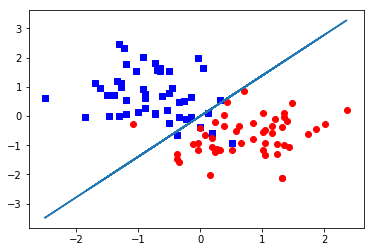

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
markers = ["s","o"]
colors = ["b","r"]
for i, c in enumerate(np.unique(y_data)):
    ax.scatter(x_data[:,0][y_data==c],x_data[:,1][y_data==c],c=colors[i], marker=markers[i])
ax.plot(x_data[:,0],(-k_3-k_1*x_data[:,0] )/ k_2)
print("Red = Canada , Blue = Alaska")

In [91]:
phi = np.sum(y_data==1) / 100 
mu_0 = np.sum(x_data[y_data==0],axis=0)/np.sum(y_data==0)
mu_1 = np.sum(x_data[y_data==1],axis=0)/np.sum(y_data==1)
cov_0 = np.matmul((x_data[y_data==0] - mu_0).T,x_data[y_data==0] - mu_0)/np.sum(y_data==0)
cov_1 = np.matmul((x_data[y_data==1] - mu_1).T,x_data[y_data==1] - mu_1)/np.sum(y_data==1)

After this we relax the assumption of same covariance matrices and allow them to be different. The new covariance matrices are as follows (other parameters are unchanged).

In [92]:
print("Cov_0 is ",cov_0)

Cov_0 is  [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]


In [93]:
print("Cov_1 is ", cov_1)

Cov_1 is  [[ 0.47747117  0.1099206 ]
 [ 0.1099206   0.41355441]]


The expression for decision boundary is now quadratic, let it be $l_1*x_1^2 + l_2*x_2^2 + l_3*x_1*x_2 + l_4*x_1 + l_5*x_2 + l_6 = 0$

The exact expressions are given below.
$$det_0 = np.linalg.det(cov_0)$$
$$det_1 = np.linalg.det(cov_1)$$
$$l_1 = (1/np.abs(det_1))*cov_1[1,1] - (1/np.abs(det_0))*cov_0[1,1]$$
$$l_2 = (1/np.abs(det_1))*cov_1[0,0] - (1/np.abs(det_0))*cov_0[0,0]$$
$$l_3 = -2*(1/np.abs(det_1))*cov_1[0,1] + 2*(1/np.abs(det_0))*cov_0[0,1]$$
$l_4 = (-2*(1/np.abs(det_1))*mu_1[0]*cov_1[1,1] + 2*(1/np.abs(det_1))*mu_1[1]*cov_1[0,1] +
       2*(1/np.abs(det_0))*mu_0[0]*cov_0[1,1] -2*(1/np.abs(det_0))*mu_0[1]*cov_0[0,1])$
$l_5 = (-2*(1/np.abs(det_1))*mu_1[1]*cov_1[0,0] + 2*(1/np.abs(det_1))*mu_1[0]*cov_1[0,1] +
       2*(1/np.abs(det_0))*mu_0[1]*cov_0[0,0] -2*(1/np.abs(det_0))*mu_0[0]*cov_0[0,1])$
$l_6 = ((1/np.abs(det_1))*mu_1[0]*mu_1[0]*cov_1[1,1] - (1/np.abs(det_1))*2*mu_1[0]*mu_1[1]*cov_1[0,1] +
       (1/np.abs(det_1))*mu_1[1]*mu_1[1]*cov_1[0,0] - (1/np.abs(det_0))*mu_0[0]*mu_0[0]*cov_0[1,1] +
       (1/np.abs(det_0))*2*mu_0[0]*mu_0[1]*cov_0[0,1] - (1/np.abs(det_0))*mu_1[1]*mu_1[1]*cov_0[0,0]+
              np.log(np.abs(det_1/det_0)))$

In [94]:
det_0 = np.linalg.det(cov_0)
det_1 = np.linalg.det(cov_1)
l_1 = (1/np.abs(det_1))*cov_1[1,1] - (1/np.abs(det_0))*cov_0[1,1]
l_2 = (1/np.abs(det_1))*cov_1[0,0] - (1/np.abs(det_0))*cov_0[0,0]
l_3 = -2*(1/np.abs(det_1))*cov_1[0,1] + 2*(1/np.abs(det_0))*cov_0[0,1]
l_4 = (-2*(1/np.abs(det_1))*mu_1[0]*cov_1[1,1] + 2*(1/np.abs(det_1))*mu_1[1]*cov_1[0,1] +
       2*(1/np.abs(det_0))*mu_0[0]*cov_0[1,1] -2*(1/np.abs(det_0))*mu_0[1]*cov_0[0,1])
l_5 = (-2*(1/np.abs(det_1))*mu_1[1]*cov_1[0,0] + 2*(1/np.abs(det_1))*mu_1[0]*cov_1[0,1] +
       2*(1/np.abs(det_0))*mu_0[1]*cov_0[0,0] -2*(1/np.abs(det_0))*mu_0[0]*cov_0[0,1])
l_6 = ((1/np.abs(det_1))*mu_1[0]*mu_1[0]*cov_1[1,1] - (1/np.abs(det_1))*2*mu_1[0]*mu_1[1]*cov_1[0,1] +
       (1/np.abs(det_1))*mu_1[1]*mu_1[1]*cov_1[0,0] - (1/np.abs(det_0))*mu_0[0]*mu_0[0]*cov_0[1,1] +
       (1/np.abs(det_0))*2*mu_0[0]*mu_0[1]*cov_0[0,1] - (1/np.abs(det_0))*mu_1[1]*mu_1[1]*cov_0[0,0]+
              np.log(np.abs(det_1/det_0)))

Finally we plot the data, linear decision boundary and quadratic decision boundary on the same plot.

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
markers = ["s","o"]
colors = ["b","r"]
for i, c in enumerate(np.unique(y_data)):
    ax.scatter(x_data[:,0][y_data==c],x_data[:,1][y_data==c],c=colors[i], marker=markers[i])
ax.plot(x_data[:,0],(-k_3-k_1*x_data[:,0] )/ k_2)
xs = x_data[:,0]
# Quadratic solution
ys = (-(l_3*x_data[:,0]+l_5) +
            (np.sqrt(np.square(l_3*x_data[:,0]+l_5) -
                     4*l_2*(l_1*x_data[:,0]*x_data[:,0] +l_4*x_data[:,0]+l_6)) ))/(2*l_2)
xs, ys = zip(*sorted(zip(xs,  ys  )))
ax.plot(xs,ys,c="g")
print("Red = Canada , Blue = Alaska")

Red = Canada , Blue = Alaska


It is clear from the graph that the quadratic boundary seems to be a better fit as it takes care of a few points which protrude out of the linear boundary. We can also observe that the different spreading out of the two classes has an effect on the quadratic boundary. The blue points seem more vertically spread out than the red points and hence the boundary bends to accomodate those points. 